In [1]:
import networkx as nx
import rdkit
import torch
from IPython.core.display import SVG, display
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors, AllChem, rdmolops
from rdkit.Chem.rdMolDescriptors import CalcNumAtomStereoCenters
from torch_geometric.data import DataLoader
from molNet.featurizer.molecule_featurizer import default_molecule_featurizer
from molNet.mol.molecules import Molecule

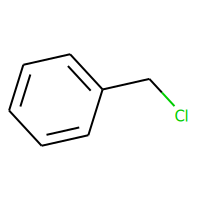

In [2]:
from molNet.nn.models.graph_convolution import GraphFingerprint
m = Molecule(rdkit.Chem.MolFromSmiles("c1ccccc1CCl"))
display(SVG(m.to_svg()))
mg = m.to_molgraph()

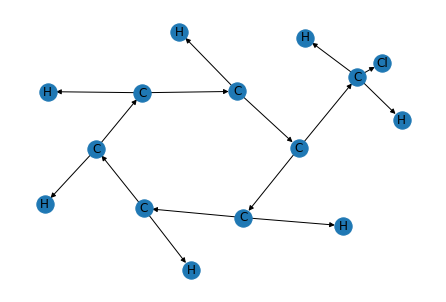

In [3]:
nx.nx_pylab.draw(
    mg,
    pos=nx.nx_pylab.spring_layout(mg,iterations=10,
                                  pos=nx.nx_pylab.kamada_kawai_layout(mg)
                                  ),
    with_labels=True,
    labels = {i:mg.mol.GetAtomWithIdx(i).GetSymbol() for i in mg.nodes },
)



In [4]:
mg.featurize(molecule_featurizer=default_molecule_featurizer)

In [5]:
mg.to_graph_input()

Data(edge_index=[2, 30], graph_features=[18], node_features=[15, 122])

In [6]:
data=mg.to_graph_input()

gcn = GraphFingerprint(in_feats=data.node_features.shape[1],hidden_feats=[None],fingerprint_size=1,activation=torch.nn.Sigmoid)
data = DataLoader([data], batch_size=32, shuffle=False)
for d in data:
    print(d)
    print(gcn(d))

Batch(batch=[15], edge_index=[2, 30], graph_features=[1], node_features=[15, 122])
tensor([[0.2592]], grad_fn=<SigmoidBackward>)
